In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import cv2 as cv

In [2]:
# Define Paths
data_path = '../data/ISIC_2019_Training_Input'
csv_path = '../data/ISIC_2019_Training_GroundTruth.csv'

In [3]:
assert os.path.exists(csv_path), f"File {csv_path} not found!"
assert os.path.exists(data_path), f"File {data_path} not found!"

In [4]:
# Load metadata
df = pd.read_csv(csv_path)

In [5]:
# Display basic info
print('Dataset Info:')
print(df.info())
print('\n5first rows:')
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25331 entries, 0 to 25330
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   image   25331 non-null  object 
 1   MEL     25331 non-null  float64
 2   NV      25331 non-null  float64
 3   BCC     25331 non-null  float64
 4   AK      25331 non-null  float64
 5   BKL     25331 non-null  float64
 6   DF      25331 non-null  float64
 7   VASC    25331 non-null  float64
 8   SCC     25331 non-null  float64
 9   UNK     25331 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.9+ MB
None

5first rows:
          image  MEL   NV  BCC   AK  BKL   DF  VASC  SCC  UNK
0  ISIC_0000000  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
1  ISIC_0000001  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
2  ISIC_0000002  1.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
3  ISIC_0000003  0.0  1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0
4  ISIC_0000004  1.0  0.0  0.0  0.0  0.0  0.0   0.0 

In [6]:
print("\nCheck missing data:")
print(df.isnull().sum())


Check missing data:
image    0
MEL      0
NV       0
BCC      0
AK       0
BKL      0
DF       0
VASC     0
SCC      0
UNK      0
dtype: int64


In [7]:
# Convert one-hot encoded labels to single column
df['label'] = df[['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']].idxmax(axis = 1)

In [8]:
assert all(df[['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK']].sum(axis=1) == 1)

In [9]:
df.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK,label
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NV
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MEL


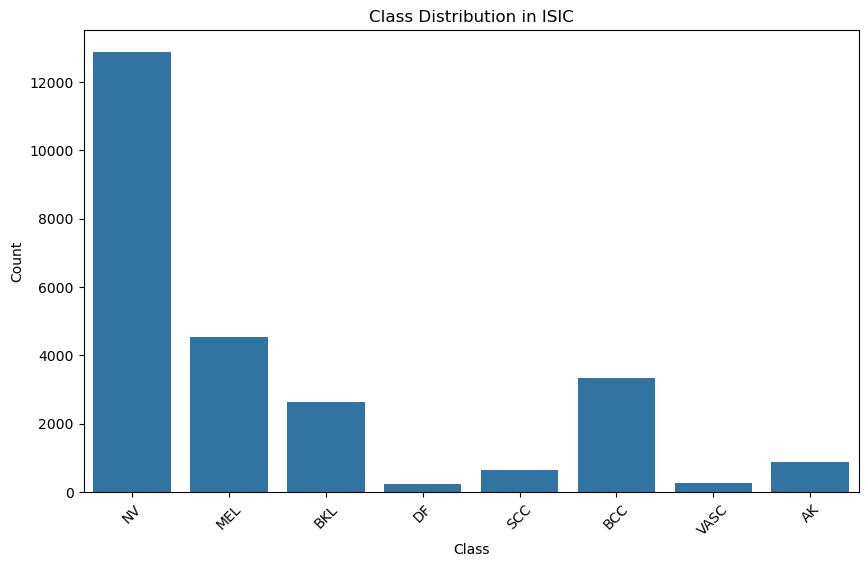

In [10]:
# Plot class distribution
plt.figure(figsize = (10,6))
sns.countplot(x = 'label', data = df)
plt.title('Class Distribution in ISIC')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

In [11]:
# Print class counts
print('\nClass counts:')
print(df['label'].value_counts())


Class counts:
label
NV      12875
MEL      4522
BCC      3323
BKL      2624
AK        867
SCC       628
VASC      253
DF        239
Name: count, dtype: int64


In [12]:
class_percentages = df['label'].value_counts(normalize=True) * 100
print("\nClass percentage:")
print(class_percentages)


Class percentage:
label
NV      50.827050
MEL     17.851644
BCC     13.118314
BKL     10.358849
AK       3.422684
SCC      2.479176
VASC     0.998776
DF       0.943508
Name: proportion, dtype: float64


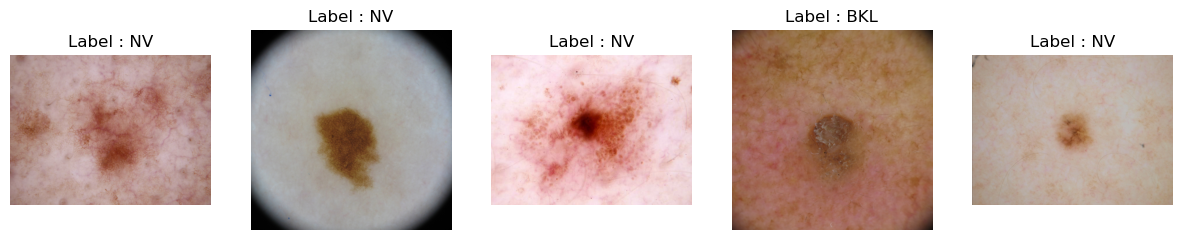

In [15]:
# Display sample images
def plot_sample_images(df, data_path, num_samples=5):
    sample_df = df.sample(num_samples)
    plt.figure(figsize=(15, 5))
    for i, row in enumerate(sample_df.itertuples()):
        img_path = os.path.join(data_path, row.image + '.jpg')
        img = cv.imread(img_path)
        if img is None:
            print(f"image {img_path} not loaded!")
            continue
        img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f"Label : {row.label}")
        plt.axis('off')
    plt.show()
    

plot_sample_images(df, data_path)


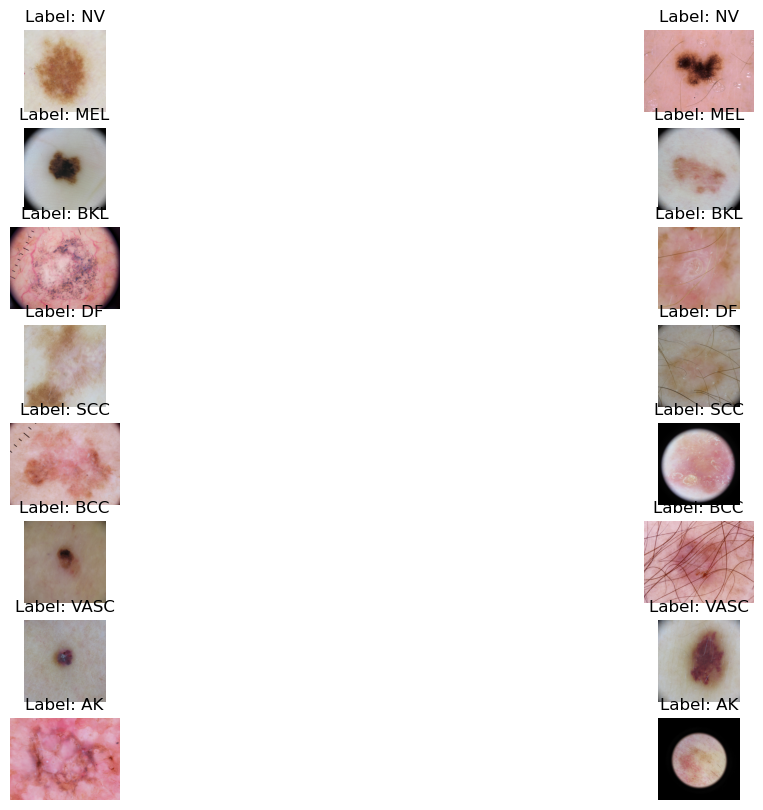

In [20]:
def plot_samples_per_class(df, data_path, num_samples=2):
    plt.figure(figsize=(15, 10))
    for i, label in enumerate(df['label'].unique()):
        class_samples = df[df['label'] == label].sample(num_samples)
        for j, row in enumerate(class_samples.itertuples()):
            img_path = os.path.join(data_path, row.image + '.jpg')
            img = cv.imread(img_path)
            if img is None:
                print(f"image {img_path} not loaded !")
                continue
            img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
            plt.subplot(len(df['label'].unique()), num_samples, i*num_samples + j + 1)
            plt.imshow(img)
            plt.title(f"Label: {row.label}")
            plt.axis('off')
    plt.show()

plot_samples_per_class(df, data_path, num_samples = 2)

In [21]:
# Check image resolutions
resolutions = []
for img_name in df['image']:
    img_path = os.path.join(data_path, img_name + '.jpg')
    img = cv.imread(img_path)
    if img is not None:
        resolutions.append(img.shape[:2]) #(Height, weight)

In [22]:
# Convert to dataframe
res_df = pd.DataFrame(resolutions, columns = ['Height', 'Width'])
print('\nResolution stats:')
print(res_df.describe())


Resolution stats:
             Height         Width
count  25331.000000  25331.000000
mean     760.816075    854.896648
std      269.722902    206.942272
min      450.000000    576.000000
25%      450.000000    600.000000
50%      768.000000   1024.000000
75%     1024.000000   1024.000000
max     1024.000000   1024.000000


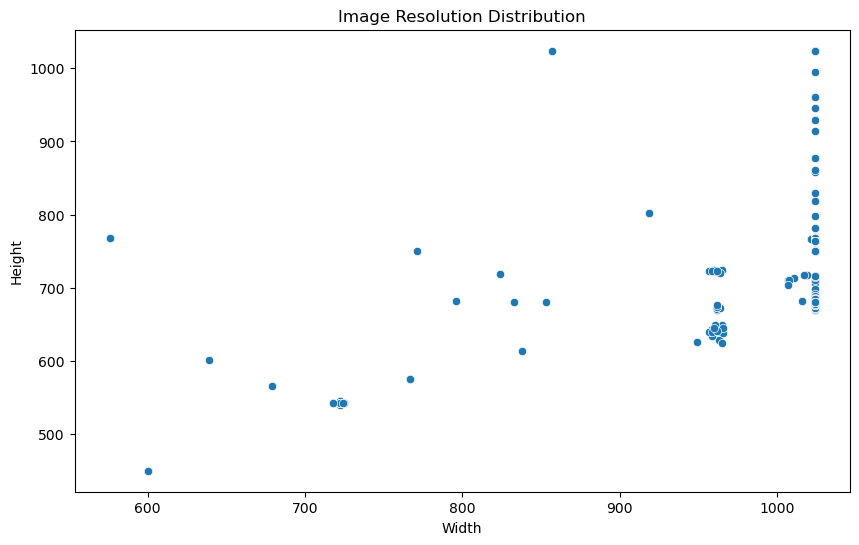

In [23]:
# Plot resolution distribution
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Width', y = 'Height', data = res_df)
plt.title('Image Resolution Distribution')
plt.show()

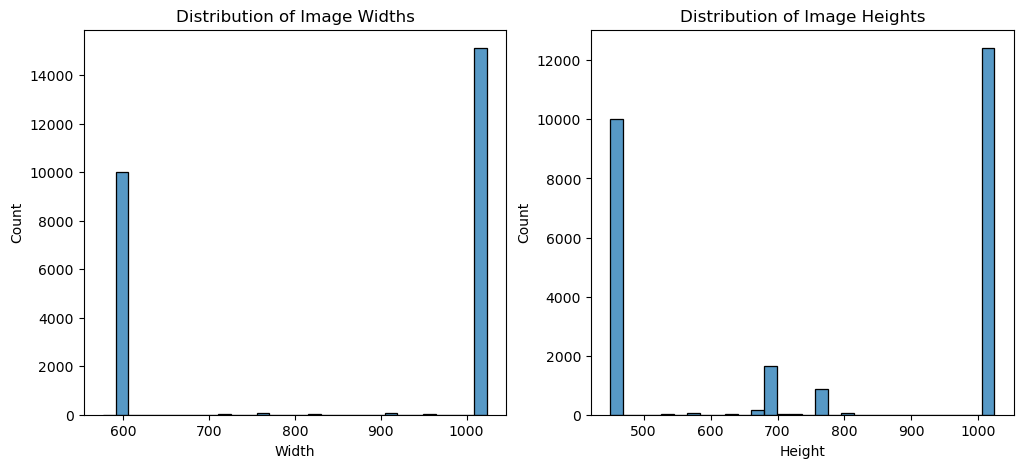

In [24]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(res_df['Width'], bins=30)
plt.title('Distribution of Image Widths')
plt.subplot(1, 2, 2)
sns.histplot(res_df['Height'], bins=30)
plt.title('Distribution of Image Heights')
plt.show()